# Global context for energy transition: population, wealth, energy

## Python
### Opening comment  
Most python programs start with a descriptive comment block.  
The very first line might be a special comment called a 'shebang' such as  
`#!/usr/bin/env python3`  
This tells the operating system how to execute it when it is run as a stand-alone program.  
However, if you are working in spyder then it is not critical to have it there.  

More important is to simply have a descriptive comment at the start of every significant piece of code, e.g. start of program, start of function, start of class, etc. so that you know what the code does. This first comment block is often read automatically by help systems (such as the one in spyder).

### import
Most programs reuse code that has already been written and saved as a module or package of modules. All this code is usually imported at the start of the program, directly after the opening comment block, using a series of **import** statements.  
A single file of code is called a *module* and a folder of modules is called a *package*.  

We will extensively use the numerical python package **numpy** and the **matplotlib** maths plotting package.

There are several ways to import...

`import numpy`  
allows you to refer to any function() in numpy as `numpy.function()`

`import numpy as np`  
allows you to refer to any function() in numpy as `np.function()`  
This is more convenient and the conventional use.

`import matplotlib.pyplot`  
would allow the plot function to be accessed with `matplotlib.pyplot.plot()`

`from matplotlib import pyplot`  
would allow the plot function to be accessed with `pyplot.plot()`

`import matplotlib.pyplot as plt`  
would allow the plot function to be accessed with `plt.plot()`  
This is the most common implementation for the `pyplot` module, 
because pyplot has several useful functions, and it is useful to be  
reminded they are defined in that module (you may make your own plot function).

`from matplotlib.pyplot import plot`  
would allow the plot function to be accessed directly with `plot()`   
We might use this syntax for more specific technical functions, e.g. from the `scipy` package.  

### Array-like objects
We will deal with structured data that can be thought of as vectors, or they may have higher dimensions, such as a 2D table of data or even a cube of data. We will mostly use numpy arrays, though you need to be aware of a few other similar types. You can refer to individual pieces of an array-like object by indexing that item or slicing a piece. E.g. `a[0]` refers to the first item in object a - all arrays are zero-based. `a[0:2]` refers to indices starting at 0 and less than 2. **Note the use of square brackets - don't get confused with lists**

#### ndarray
Usually returned by a numpy function, e.g. when loading data, but can be instantiated directly from any array-like object (see below).

#### list
A **list** (type) is identified with square \[brackets\] and is an arbitrary collection of objects of any type. This type is widely used in python and has some interesting functionality (beyond scope of our work).

#### tuple
A **tuple** is very similar to a list, but is identified with round (brackets). The difference between a list and a tuple is that a list is mutable, i.e. it can be modified. In some cases you want to be sure that a piece of code cannot accidentally modify a set of objects that you identify or input, so a tuple is useful for that.

We *instantiate* the objects below using the `=` assignment operator.  
We compare the objects below using the `==` equality operator.


In [1]:
""" 
    This first comment block normally contains a general description of the code. 
    If you are writing a function and start typing the comment block directly after a 
    function declaration, spyder will structure it automatically for you.
"""

# This next line is only useful in a jupyter notebook, you don't need it in spyder.
# It tells the notebook how to display matplotlib graphics (best options are: inline or notebook)
%matplotlib inline

# This is the first code cell, so import useful packages/modules.
import numpy as np
import matplotlib.pyplot as plt

# instantiate some test objects using the asignment operator =
a = [1.0,2.0,3.0]
b = (1.0,2.0,3.0)
c = np.array(a)
d = np.array(b)

# print the values and type of object
print('a is',a,type(a))
print('b is',b,type(b))
print('c is',c,type(c))
print('d is',d,type(d))

print('slice a[0:2] is',a[0:2])

# print comparison tests
# a is not equal to b because they are different types of object, even though they have equal values
print('a==b',a==b)
# comparison of two numpy arrays gives an array of truth (bool) values
print('c==d',c==d)

# modify a specific element
a[0] = 4.0
c[0] = 4.0
print('new a and c',a,c)
print('c==d',c==d)

# see what an error looks like - a tuple can't be modified once created.
# the try command allows you to manage when a program goes wrong 
# you don't need to worry about using the try command.
# If you want to see what a real error looks like, just  uncomment the line below.
# b[0] = 4.0 
try:  
    b[0] = 4.0 
except Exception as e: 
    print('Exception:',e)


a is [1.0, 2.0, 3.0] <class 'list'>
b is (1.0, 2.0, 3.0) <class 'tuple'>
c is [1. 2. 3.] <class 'numpy.ndarray'>
d is [1. 2. 3.] <class 'numpy.ndarray'>
slice a[0:2] is [1.0, 2.0]
a==b False
c==d [ True  True  True]
new a and c [4.0, 2.0, 3.0] [4. 2. 3.]
c==d [False  True  True]
Exception: 'tuple' object does not support item assignment


### Array-like objects are iterable
We can *iterate* though each item in an array-like object using  

**for** item **in** list:

    and then indentation tells the code which lines are
    
    within the loop and can do something with the item
    
and following lines outside the loop are indented the same as the `for item in list` statement.  

However, it is better and faster not to iterate unless you really have to.  
For example, say you only wanted to multiply by 2 if values of c were >2. There are 2 ways to do this...


In [2]:
print('c',c)
# multiply whole array by 2
print('2c',2*c)

# iterate through each value
for value in c:
    if value > 2:
        print('2*value =', 2*value)

# This is better code...
# select the wanted values then operate on the specifically-indexed array
selection = (c > 2)
print('selection',selection)
print('2c with only c>2', 2*c[selection])

c [4. 2. 3.]
2c [8. 4. 6.]
2*value = 8.0
2*value = 6.0
selection [ True False  True]
2c with only c>2 [8. 6.]


## Global wealth: Loading and plotting data
There are many ways to load data and it can be challenging. First open the input file to take a look at it. Does it have header lines? Does it have characters that comment out unwanted data within the file? Is it organized into columns? What type of values are they (integers, floating point, strings, time)?  You may have to pre-process the data to get into better shape, or maybe you can load each data column separately to make life easier.  

We will primarily use the numpy functions `np.loadtxt()` or `np.genfromtxt()` which are similar to each other. If you want more power, then look at the module called `pandas` or you will have to write your own program to parse data into a useable form.  

Let's just jump in and look at a data file.

In [3]:
filename = '../data/economy/gdp-per-capita-world-usd2010.csv'

gdpYear = np.genfromtxt(filename,delimiter=',',skip_header=1,usecols=(0,))

gdpPerCapita = np.genfromtxt(filename,delimiter=',',skip_header=1,usecols=(1,))

print('gdpYear',type(gdpYear),gdpYear)
print('gdpPerCapita',gdpPerCapita)


gdpYear <class 'numpy.ndarray'> [1960. 1961. 1962. 1963. 1964. 1965. 1966. 1967. 1968. 1969. 1970. 1971.
 1972. 1973. 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981. 1982. 1983.
 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993. 1994. 1995.
 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003. 2004. 2005. 2006. 2007.
 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016. 2017. 2018. 2019.]
gdpPerCapita [ 3746.06  3856.39  3999.22  4127.27  4315.85  4461.24  4619.75  4732.41
  4933.17  5128.15  5204.43  5318.4   5510.96  5756.23  5758.91  5687.47
  5882.21  6008.51  6135.19  6277.66  6287.17  6296.89  6212.28  6250.68
  6419.94  6543.75  6648.45  6774.26  6963.88  7096.59  7178.94  7162.1
  7176.07  7173.76  7278.24  7386.63  7527.55  7694.3   7782.64  7928.28
  8167.84  8221.29  8294.77  8434.21  8696.87  8926.04  9202.54  9483.25
  9540.78  9267.69  9551.34  9737.34  9865.63 10009.86 10174.84 10346.93
 10493.15 10713.1  10924.48 11075.81]


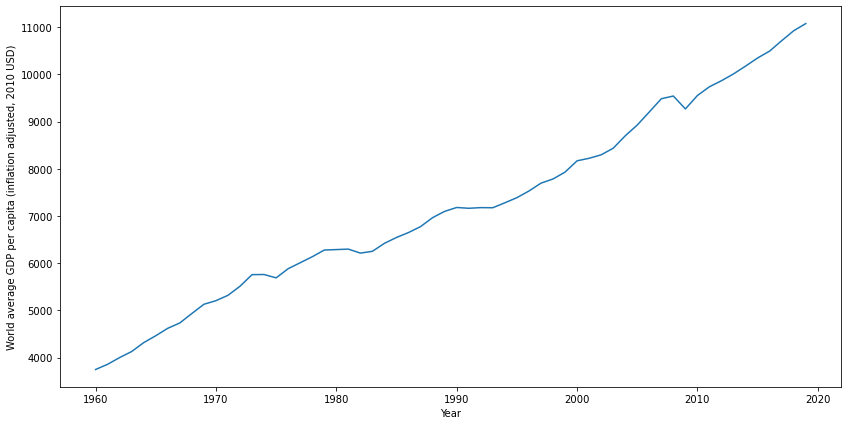

In [4]:
plt.figure(figsize=[14,7])
plt.xlabel('Year')
plt.ylabel('World average GDP per capita (inflation adjusted, 2010 USD)')
plt.plot(gdpYear,gdpPerCapita)
plt.show()

The world has got steadily wealthier, on average, over the last 60 years. We have more stuff and more expectations.


## Formatting a good figure

It is important to think about the end use of a figure when constructing it. First, consider what size you want it to be finally presented at. Of key significance is that the main point of the figure will be visible (not too small) and that the text will be uniformly sized through the figures in your document. Text on the same figure should all be close to the same size. Finished text sizes should not be smaller than 6 pt. If you will present a figure in your thesis that may be reduced when published in a journal article, then maybe **produce text in your report at 10-12 pt** if you might reduce by a factor of nearly 50% eventually.  

**Finished text size (smallest text at about 6 pt) is how a figure will be sized by a journal**  
This is the minimum size.

Below is an example of the figure reformatted more appropriately for a single column plot in a journal.  
See the [pyplot tutorial](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) for more ideas.  
You can also use style sheets and `rcParams` to [customize plots](https://matplotlib.org/stable/tutorials/introductory/customizing.html). 

Be sure to export/save the file at high resolution. I save it here in two different formats.

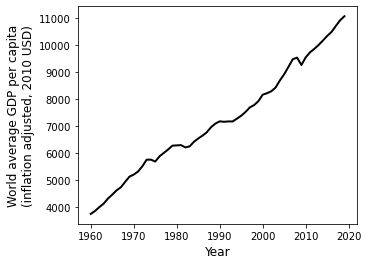

In [5]:
plt.figure(figsize=[5,4])
plt.xlabel('Year', fontsize=12)
# the '\n' introduces a new line and can be used in any string
plt.ylabel('World average GDP per capita\n(inflation adjusted, 2010 USD)',
           fontsize=12)
plt.plot(gdpYear,gdpPerCapita,linewidth=2,color='black')
# the bbox_inches keyword controls the layout
plt.savefig('../figs/gdpPerCapita.pdf',bbox_inches='tight')
plt.savefig('../figs/gdpPerCapita.jpg',dpi=300,bbox_inches='tight')
plt.show()

## Energy consumption history

The csv data were downloaded from https://ourworldindata.org/energy. The sources of the data are Vaclav Smil (2017; Energy Transitions: Global and National Perspectives) & BP Statistical Review of World Energy. The file is easy to read, but each column is a particular type of energy (all in TWh) and there is not a combined value - but we can compute that easily.

We choose to load the year separately, so that it does not get added into the energy values, which we sum along a horizontal axis.

In [6]:
dataDir = '../data/energy-consumption/'
filename = dataDir + 'global-primary-energy.csv'

energyYear = np.genfromtxt(filename,delimiter=',',skip_header=1,usecols=(2,))

energy = np.genfromtxt(filename,delimiter=',',skip_header=1,usecols=range(3,12))

energyTotal = np.sum(energy, axis=1)

print(energyYear)

[1800. 1810. 1820. 1830. 1840. 1850. 1860. 1870. 1880. 1890. 1900. 1910.
 1920. 1930. 1940. 1950. 1960. 1965. 1966. 1967. 1968. 1969. 1970. 1971.
 1972. 1973. 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981. 1982. 1983.
 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993. 1994. 1995.
 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003. 2004. 2005. 2006. 2007.
 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016. 2017. 2018.]


## UN population projection

We load a United Nations population projection (Medium-fertility variant). It is a well-behaved csv file with first line headers. If we use the np.genfromtxt() function then we can automatically assign names to columns using the headers (an alternative approach to what we already did). The time array is evenly spaced from 1950 to 2100, so ideal for modelling into the future (which we will do later). We rescale population values from numbers in thousands to millions, for later convenience.

In [8]:
dataDir = '../data/world-population/'
filename = dataDir + 'UN2019-population-projection-world-Medium.csv'

unPopulationModel = np.genfromtxt(filename, delimiter=',', names=True)

t = unPopulationModel['Time']
print(t)

N = unPopulationModel['PopTotal'] / 1000

[1950. 1951. 1952. 1953. 1954. 1955. 1956. 1957. 1958. 1959. 1960. 1961.
 1962. 1963. 1964. 1965. 1966. 1967. 1968. 1969. 1970. 1971. 1972. 1973.
 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981. 1982. 1983. 1984. 1985.
 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993. 1994. 1995. 1996. 1997.
 1998. 1999. 2000. 2001. 2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009.
 2010. 2011. 2012. 2013. 2014. 2015. 2016. 2017. 2018. 2019. 2020. 2021.
 2022. 2023. 2024. 2025. 2026. 2027. 2028. 2029. 2030. 2031. 2032. 2033.
 2034. 2035. 2036. 2037. 2038. 2039. 2040. 2041. 2042. 2043. 2044. 2045.
 2046. 2047. 2048. 2049. 2050. 2051. 2052. 2053. 2054. 2055. 2056. 2057.
 2058. 2059. 2060. 2061. 2062. 2063. 2064. 2065. 2066. 2067. 2068. 2069.
 2070. 2071. 2072. 2073. 2074. 2075. 2076. 2077. 2078. 2079. 2080. 2081.
 2082. 2083. 2084. 2085. 2086. 2087. 2088. 2089. 2090. 2091. 2092. 2093.
 2094. 2095. 2096. 2097. 2098. 2099. 2100.]


## Your task

You can now load and plot data yourself. Create a python program in your `code` directory. I suggest you call it something like `energy-population-wealth.py`. Load all the data and plot all three curves. You can get them all on the same plot or create 3 separate plots. We will come back to these data and plot projections into the future in a later task. Experiment with loading, manipulating and displaying data.